import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


This part imports necessary libraries:

1-pandas for data manipulation

2-numpy for numerical operations

3-matplotlib.pyplot for plotting

4-seaborn for data visualization

5-RandomForestClassifier from scikit-learn for building the model

6-accuracy_score, confusion_matrix, and classification_report from scikit-learn for model evaluation

7-SimpleImputer from scikit-learn to handle missing values.


In [2]:
train_data = pd.read_csv("/fraudTrain.csv")
test_data = pd.read_csv("/fraudTest.csv")


This loads the training and test datasets into pandas DataFrames from CSV files. Adjust the file paths according to your file locations

In [3]:
print("Training Data:")
print(train_data.head())
print(train_data.info())

print("\nTest Data:")
print(test_data.head())
print(test_data.info())


Training Data:
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Sui

This prints the first few rows and the information (including data types and missing values) of the training and test datasets.


In [4]:
print("Missing values in training data:")
print(train_data.isnull().sum())

print("Missing values in test data:")
print(test_data.isnull().sum())


Missing values in training data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64
Missing values in test data:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state  

This prints the total number of missing values in each column of the training and test datasets.


In [6]:
print(train_data.columns)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


This prints the column names of the training dataset.


In [8]:
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']


This separates the features (X_train, X_test) and target variable (y_train, y_test) from the datasets.

In [9]:
X_train_numeric = X_train.select_dtypes(include=np.number)  # Select numeric columns
X_test_numeric = X_test.select_dtypes(include=np.number)  # Select numeric columns


This selects only numeric columns from the features in both training and test datasets.


In [11]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_numeric)
X_test_imputed = imputer.transform(X_test_numeric)


This imputes missing values in the numeric features using the mean strategy.


In [13]:
# Handle missing values in the target variable by filling NaN with mode
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_test.mode()[0], inplace=True)


This handles missing values in the target variable by filling NaN values with the mode.


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)


RandomForestClassifier(random_state=42)

This initializes and fits a RandomForestClassifier model with 100 estimators and a random state of 42 using the training data.


In [15]:
y_pred = rf_model.predict(X_test_imputed)


This makes predictions on the test data using the trained model.


In [16]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9959684682752764

Confusion Matrix:
 [[116067     59]
 [   411     44]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    116126
         1.0       0.43      0.10      0.16       455

    accuracy                           1.00    116581
   macro avg       0.71      0.55      0.58    116581
weighted avg       0.99      1.00      0.99    116581



This calculates and prints the accuracy score, confusion matrix, and classification report of the model's predictions on the test data.

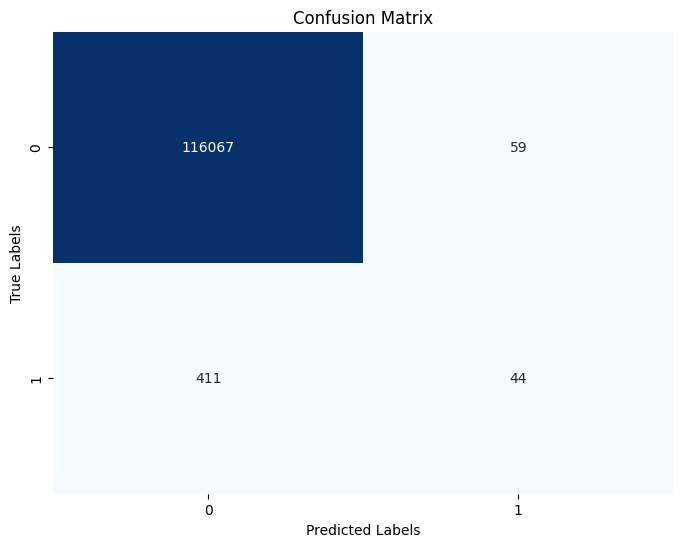

In [17]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


This visualizes the confusion matrix using seaborn's heatmap. It displays the true labels on the y-axis and predicted labels on the x-axis.